<a href="https://colab.research.google.com/github/nihar-max/Anomaly-Detection-of-ECG-using-AutoEncoders/blob/master/Anomaly_Detection_of_ECG_using_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

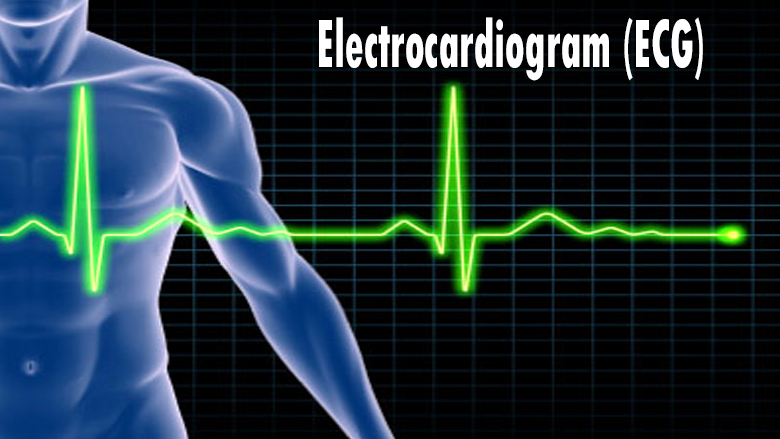

# Anomaly Detection of ECG using AutoEncoders

An electrocardiogram — also called ECG or EKG — is often done in a health care provider's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smartwatches, offer ECG monitoring. Ask your health care provider if this is an option for you

### Attribute Information
- We have 141 features out of which 140 features are use to measures the heart activity.

### Target Variable
- As a binary data Category 1 means Normal activity, 0 means abnormal activity.

### Objective:
- Detect Anomaly detection of ECG using AutoEncoders based on its reconstruction error.



In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['axes.grid'] = False

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ECG_Project/ecg.csv',header =None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [ ]:
df = df.add_prefix('c')

In [ ]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

### 1.0 Check for Missing values

In [ ]:
#Let us capture all the nan values
features_nan = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
print("*"*50)
for feature in features_nan:
  print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),3)*100))
print("*"*50)
print("Data type of those missing nan value features:")
print(df[features_nan].dtypes)

**************************************************
**************************************************
Data type of those missing nan value features:
Series([], dtype: object)


### 1.2 Basic Statistics

In [ ]:
print("Total Data-points :",df.shape[0])
print("Number of Features :",df.shape[1])
print("Target variable distribution:")
print( df['c140'].value_counts())

Total Data-points : 4998
Number of Features : 141
Target variable distribution:
1.0    2919
0.0    2079
Name: c140, dtype: int64


### 1.2.1 Distribution of data points among Target Variable

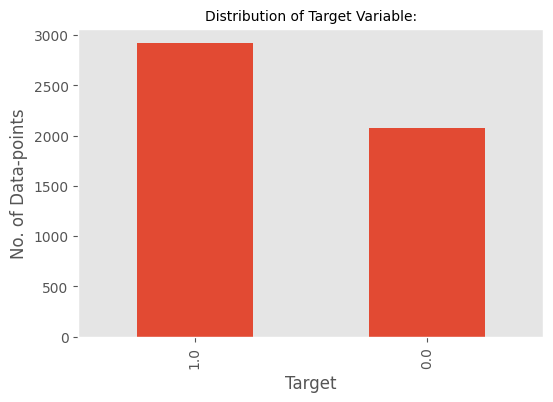

Number of data points in 1.0 is : 2919 ( 58.403 %)
Number of data points in 0.0 is : 2079 ( 41.597 %)


In [ ]:
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['axes.grid'] = False

target = []
target = df.c140.unique()
target_dist =df.c140.value_counts()
fig, ax = plt.subplots()
plt.title('Distribution of Target Variable:', fontsize=10)
ax = df.c140.value_counts().plot(kind='bar')
ax.set_ylabel('No. of Data-points')
ax.set_xlabel('Target')


plt.show()

sorted_yi = np.argsort(-target_dist.values)
for i in sorted_yi:
    print('Number of data points in', target[i] ,'is :',target_dist.values[i], '(', np.round((target_dist.values[i]/df.shape[0]*100), 3), '%)')


In [ ]:
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


## 2. Train Test Split

In [ ]:
#Now we will separate the data and labels so that it will be easy for us
data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
labels

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

### 2.1 Scale the feature using Min-Max Scaling

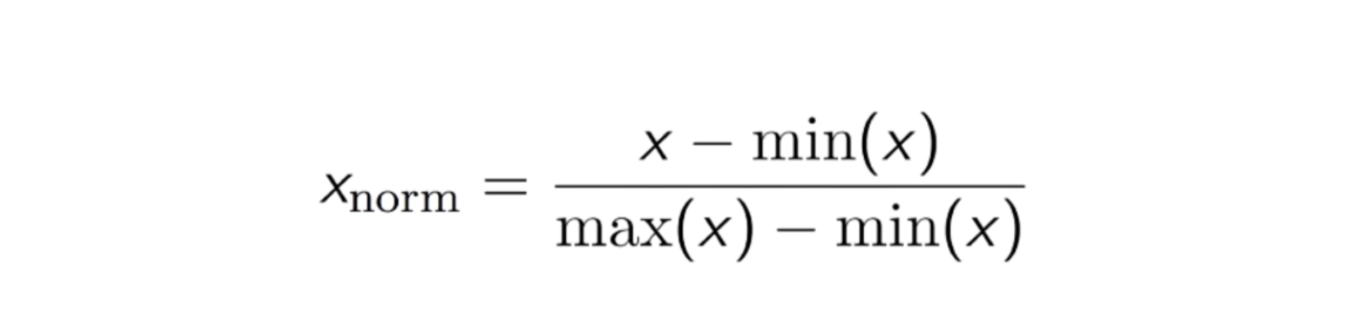

In [ ]:
#Now lets Normalize the data
#First we will calculate the maximum and minimum value from the training set
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#Now we will use the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#I have converted the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [ ]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false)
# Category 1 Normal activity is True
# Category 0 Abnormal activity is False
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)


#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]

print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


### 3.1.1 Normal ECG for first 3 records

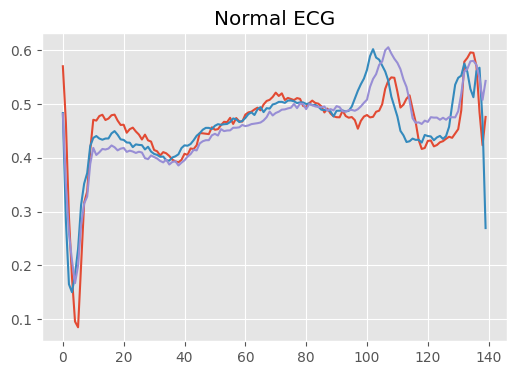

In [ ]:
#Lets plot a normal ECG
plt.plot(np.arange(140), n_train_data[0])
plt.plot(np.arange(140), n_train_data[1])
plt.plot(np.arange(140), n_train_data[2])
plt.grid()
plt.title('Normal ECG')
plt.show()

**Observation**: Initially there is a drop in ECG as it is beginning of ECG measurement, but after that it is at normal throughout.

### 3.1.2 Abnormal ECG for first 3 records

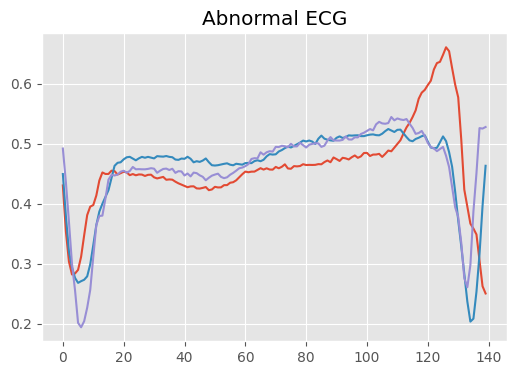

In [ ]:
#Lets plot one from abnormal ECG
plt.plot(np.arange(140), an_train_data[0])
plt.plot(np.arange(140), an_train_data[1])
plt.plot(np.arange(140), an_train_data[2])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

**Observation**: In Abnormal it is normal at beginning but as it go forwards there is much higher drop than beginning.

## 4.1 Use Auto-Encoder
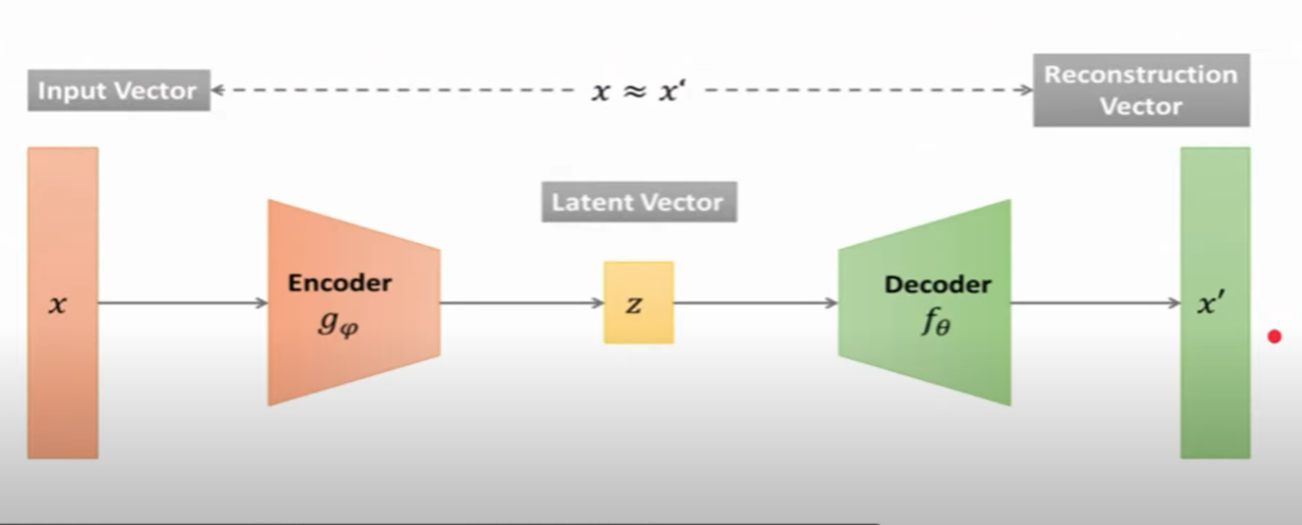

#### Diffrence between Input and Output is Reconstruction Error
- Note:  Reconstruction Error for Anomaly data will be very high, and that will help us to determine wheater the output is Anomaly or Normal

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(140, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model= AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')
# Early stopping if model does not improve after 2 run

model.compile(optimizer='adam', loss='mae')

In [ ]:
history = model.fit(n_train_data, n_train_data,
          epochs=50,
          batch_size=152,
          validation_data=(n_test_data, n_test_data),
          shuffle=True,
          callbacks=[early_stopping])

Epoch 1/50
16/16 [==============================] - 2s 16ms/step - loss: 0.0571 - val_loss: 0.0540
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0495 - val_loss: 0.0422
Epoch 3/50
16/16 [==============================] - 0s 8ms/step - loss: 0.0369 - val_loss: 0.0310
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.0262
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0235
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 7/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 8/50
16/16 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0202
Epoch 9/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0205 - val_loss: 0.0202
Epoch 10/50
16/16 [==============================] - 0s 9ms/step - loss: 0.0205 - val_loss: 0.0201
Epoch 11/50
16/16

Normal Data


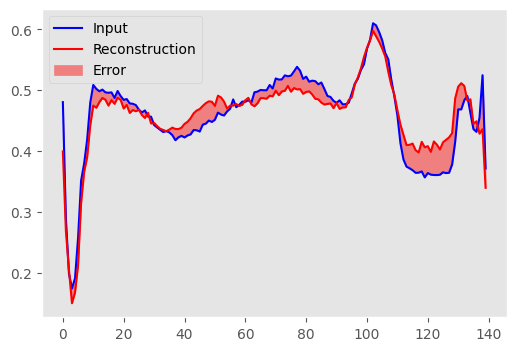

Abnormal Data


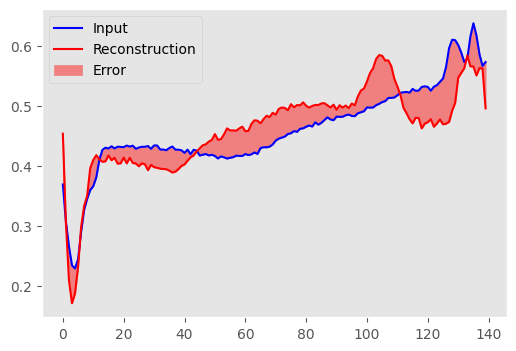

In [ ]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = model.encoder(data)
  dec_img = model.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

print("Normal Data")
plot(n_test_data, 0)
print("Abnormal Data")
plot(an_test_data, 0)

**Observation**: For Abnormal data we have high reconstruction error.

### Use Auto Encoder to detect if our output is anomaly or not

18/18 [==============================] - 0s 2ms/step


(array([ 3., 16., 27., 44., 53., 55., 53., 45., 41., 27., 26., 23., 22.,
        22., 10., 10., 24.,  9.,  6.,  9.,  5.,  2.,  3.,  3.,  0.,  0.,
         2.,  1.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  3.,
         0.,  2.,  0.,  1.,  0.,  2.,  2.,  2.,  0.,  0.,  1.]),
 array([0.00446504, 0.00558207, 0.0066991 , 0.00781613, 0.00893316,
        0.01005019, 0.01116722, 0.01228425, 0.01340128, 0.0145183 ,
        0.01563533, 0.01675236, 0.01786939, 0.01898642, 0.02010345,
        0.02122048, 0.02233751, 0.02345454, 0.02457157, 0.0256886 ,
        0.02680563, 0.02792266, 0.02903968, 0.03015671, 0.03127375,
        0.03239077, 0.0335078 , 0.03462483, 0.03574186, 0.03685889,
        0.03797592, 0.03909295, 0.04020998, 0.04132701, 0.04244404,
        0.04356106, 0.04467809, 0.04579512, 0.04691215, 0.04802918,
        0.04914621, 0.05026324, 0.05138027, 0.0524973 , 0.05361433,
        0.05473136, 0.05584839, 0.05696541, 0.05808245, 0.05919947,
        0.0603165 ]),
 <BarContainer

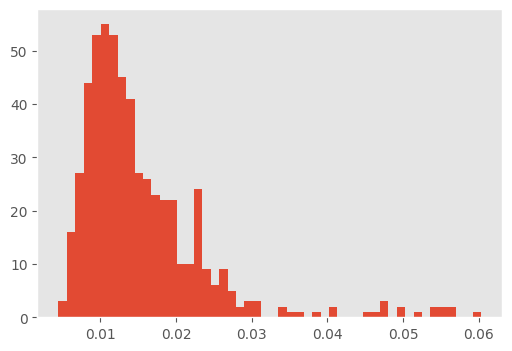

In [ ]:
reconstructions = model.predict(n_test_data)
train_loss = tf.keras.losses.mae(reconstructions, n_test_data)

plt.hist(train_loss, bins=50)

- Most of observation are covered till 0.3 for Error between Normal data and reconstructed data, so lets take 0.03 as our Threshold

In [ ]:
threshold = 0.03

#### Threshold = 0.03 i.e. any value greater than Threhold will be considerd as Anomaly ECG

14/14 [==============================] - 0s 3ms/step


(array([ 1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  5.,  7., 11., 21., 43., 42., 59., 43., 45., 32., 32.,
        19., 29., 18.,  8.,  4.,  2.,  4.,  1.,  1.,  1.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([0.00993556, 0.01139953, 0.01286349, 0.01432746, 0.01579143,
        0.0172554 , 0.01871937, 0.02018333, 0.0216473 , 0.02311127,
        0.02457524, 0.02603921, 0.02750317, 0.02896714, 0.03043111,
        0.03189508, 0.03335905, 0.03482302, 0.03628698, 0.03775095,
        0.03921492, 0.04067888, 0.04214285, 0.04360682, 0.04507079,
        0.04653476, 0.04799873, 0.04946269, 0.05092666, 0.05239063,
        0.0538546 , 0.05531857, 0.05678253, 0.0582465 , 0.05971047,
        0.06117444, 0.06263841, 0.06410237, 0.06556634, 0.06703031,
        0.06849428, 0.06995825, 0.07142221, 0.07288618, 0.07435015,
        0.07581412, 0.07727809, 0.07874206, 0.08020602, 0.08166999,
        0.08313396]),
 <BarContainer

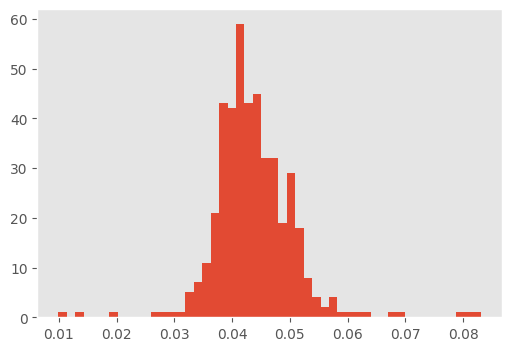

In [ ]:
reconstructions = model.predict(an_test_data)
train_loss_a = tf.keras.losses.mae(reconstructions, an_test_data)

plt.hist(train_loss_a, bins=50)

### Comparison of Normal & Anomaly ECG using Threshold

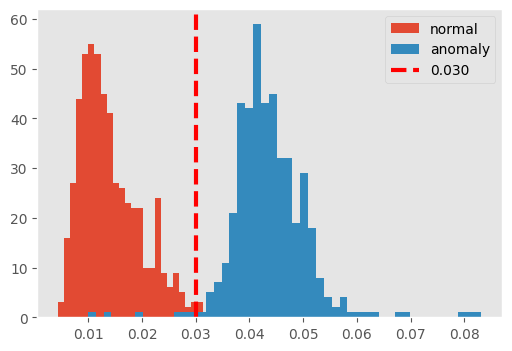

In [ ]:
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_a, bins=50, label='anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

**Observation**
- There are some blue data (Anomaly) in our orange data - False Positive
- As it is Anomaly but as our Threshold it will predict Normal
- We can move our threshold as per our condition

### 6.1 Accuracy for Normal ECG

In [130]:
preds = tf.math.less(train_loss, threshold)

print('Predicted Correctly:',tf.math.count_nonzero(preds))
print('Total Points:',preds.shape)
print("Total points not predicted correctly:", 560-535)
Acc1 = round((535/560)*100)
print("Accuracy for Normal ECG:",Acc1)

Predicted Correctly: tf.Tensor(535, shape=(), dtype=int64)
Total Points: (560,)
Total points not predicted correctly: 25
Accuracy for Normal ECG 96


In [131]:
preds_a = tf.math.greater(train_loss_a, threshold)

print('Predicted Correctly:',tf.math.count_nonzero(preds_a))
print('Total Points:',preds_a.shape)
print("Total points not predicted correctly:", 440-435)
Acc2 = round((435/440)*100)
print("Accuracy for Anomaly ECG",Acc2)

Predicted Correctly: tf.Tensor(435, shape=(), dtype=int64)
Total Points: (440,)
Total points not predicted correctly: 5
Accuracy for Anomaly ECG 99


### Comparison of Accuracy between Normal & Anomaly ECG

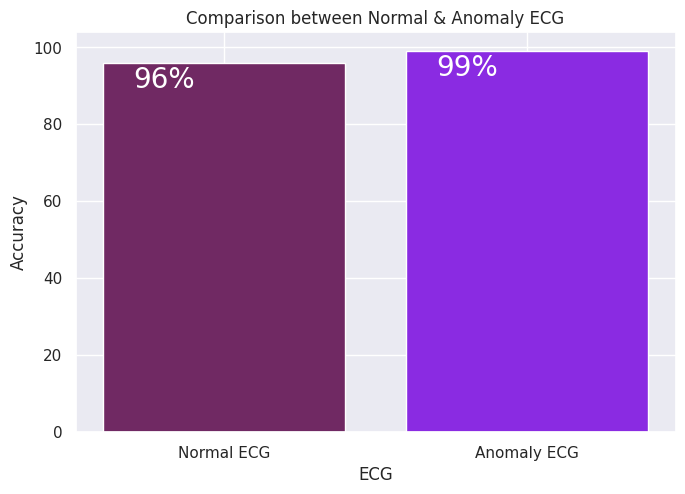

In [137]:
import seaborn as sns
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Normal ECG","Anomaly ECG"]
Accuracy=[Acc1,Acc2]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-6.5, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison between Normal & Anomaly ECG');
plt.ylabel('Accuracy');
plt.xlabel('ECG');

plt.show();

**Conclusion**:
- So using our Threshold we can predict Anomaly detection more than 99% of time and for normal detection 96% of time.